import library

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

load data set from local

In [4]:
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [5]:
df = pd.read_csv("breast-cancer.csv")
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# Chuyển đổi cột 'diagnosis' thành binary (M: 1, B: 0)
# df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

le = LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Tách features và target
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION

In [ ]:
# Khởi tạo mô hình Logistic Regression
model = LogisticRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)


Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1-score: 0.9647058823529412
Confusion Matrix:
 [[70  1]
 [ 2 41]]


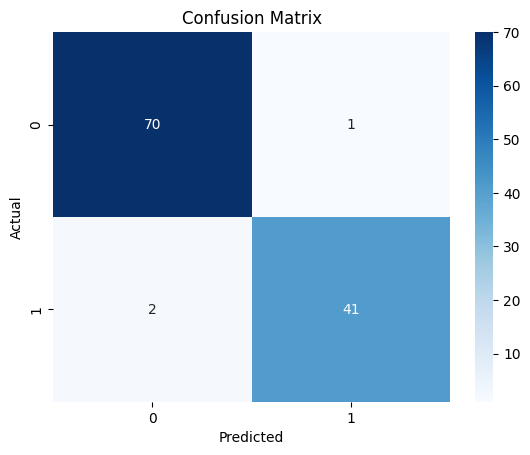

In [ ]:
LR_acc = accuracy_score(y_test, y_pred)
LR_precision = precision_score(y_test, y_pred)
LR_recall = recall_score(y_test, y_pred)
LR_f1 = f1_score(y_test, y_pred)
LR_cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", LR_acc)
print("Precision:", LR_precision)
print("Recall:", LR_recall)
print("F1-score:", LR_f1)
print("Confusion Matrix:\n", LR_cm)

# Trực quan hóa ma trận nhầm lẫn
sns.heatmap(LR_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

DECISION TREE

In [ ]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

y_pred = DT_model.predict(X_test)

DT_accuracy = accuracy_score(y_test, y_pred)
DT_precision = precision_score(y_test, y_pred)
DT_recall = recall_score(y_test, y_pred)
DT_f1 = f1_score(y_test, y_pred)
DT_cm = confusion_matrix(y_test, y_pred)

visualize

Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1-score: 0.9302325581395349
Confusion Matrix:
 [[68  3]
 [ 3 40]]


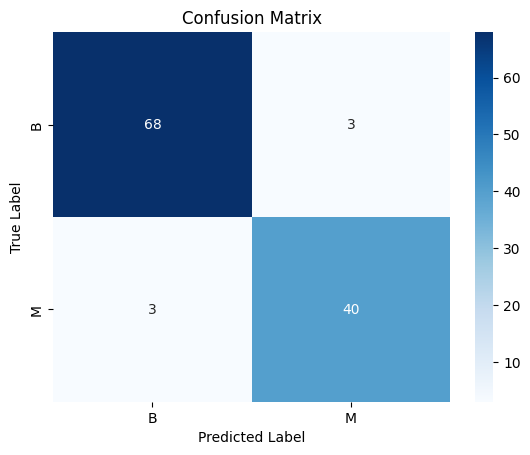

In [ ]:
print("Accuracy:", DT_accuracy)
print("Precision:", DT_precision)
print("Recall:", DT_recall)
print("F1-score:", DT_f1)
print("Confusion Matrix:\n", DT_cm)

# 7. Trực quan hóa Confusion Matrix (tùy chọn)
sns.heatmap(DT_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

MLP

In [ ]:
MLPC_model = MLPClassifier(random_state=42)

# 2. Huấn luyện mô hình với tập huấn luyện
MLPC_model.fit(X_train, y_train)

# 3. Dự đoán trên tập kiểm tra
y_pred = MLPC_model.predict(X_test)

MLPC_accuracy = accuracy_score(y_test, y_pred)
MLPC_precision = precision_score(y_test, y_pred)
MLPC_recall = recall_score(y_test, y_pred)
MLPC_f1 = f1_score(y_test, y_pred)
MLPC_cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9649122807017544
Precision: 0.9534883720930233
Recall: 0.9534883720930233
F1-score: 0.9534883720930233
Confusion Matrix:
 [[69  2]
 [ 2 41]]


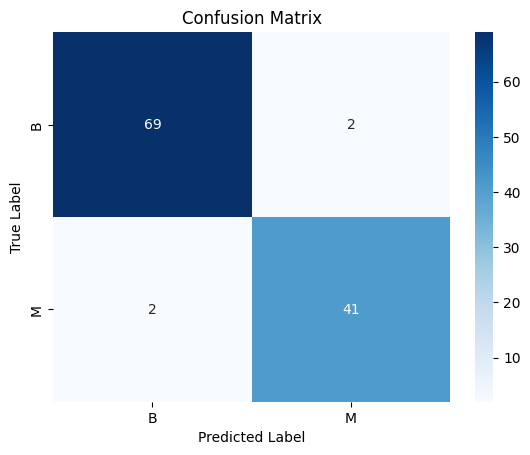

In [ ]:
print("Accuracy:", MLPC_accuracy)
print("Precision:", MLPC_precision)
print("Recall:", MLPC_recall)
print("F1-score:", MLPC_f1)
print("Confusion Matrix:\n", MLPC_cm )

sns.heatmap(MLPC_cm , annot=True, fmt='d', cmap='Blues',
            xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

SVM (Kenel)

Accuracy: 0.9649122807017544
Precision: 0.9534883720930233
Recall: 0.9534883720930233
F1-score: 0.9534883720930233
Confusion Matrix:
 [[69  2]
 [ 2 41]]


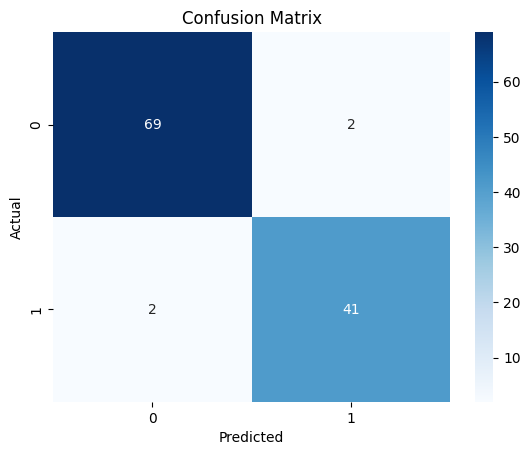

In [7]:
SVM_model = SVC(kernel='rbf',class_weight='balanced', random_state=42)

SVM_model .fit(X_train, y_train)

# 3. Dự đoán trên tập kiểm tra
y_pred = SVM_model .predict(X_test)

# 4. Tính toán các độ đo đánh giá
SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_precision = precision_score(y_test, y_pred)
SVM_recall = recall_score(y_test, y_pred)
SVM_f1 = f1_score(y_test, y_pred)
SVM_cm = confusion_matrix(y_test, y_pred)

# 5. In ra các kết quả
print("Accuracy:", SVM_accuracy)
print("Precision:", SVM_precision)
print("Recall:", SVM_recall)
print("F1-score:", SVM_f1)
print("Confusion Matrix:\n", SVM_cm)

sns.heatmap(SVM_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

CAMPARING MODELS

In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', class_weight='balanced', random_state=42, probability=True)
}


Logistic Regression Results:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


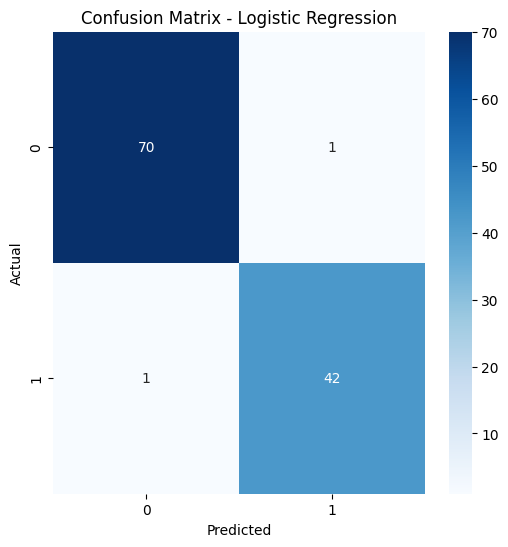


Decision Tree Results:
Accuracy: 0.95
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


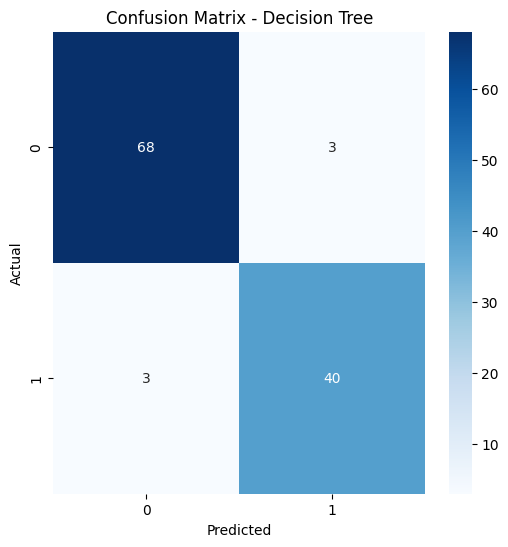


MLP Classifier Results:
Accuracy: 0.96
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


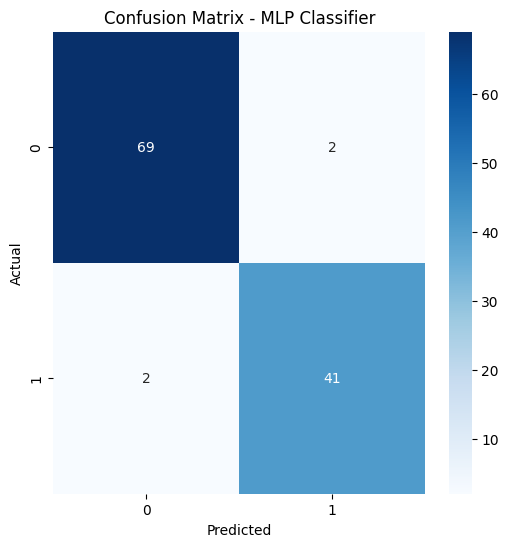


SVM (RBF Kernel) Results:
Accuracy: 0.96
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


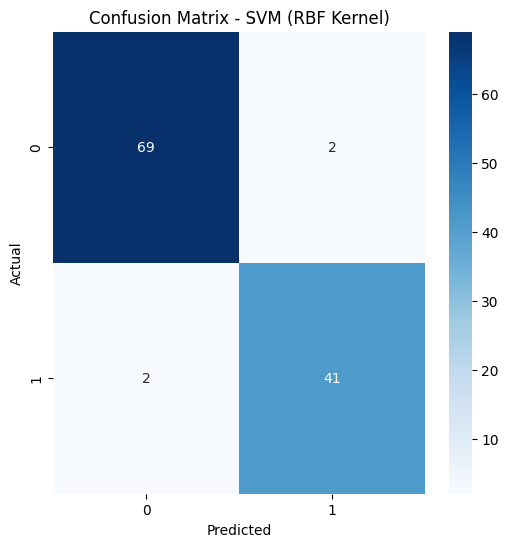


Model Performance Comparison:
Logistic Regression: Accuracy=0.98, Precision=0.98, Recall=0.98, F1 Score=0.98
Decision Tree: Accuracy=0.95, Precision=0.93, Recall=0.93, F1 Score=0.93
MLP Classifier: Accuracy=0.96, Precision=0.95, Recall=0.95, F1 Score=0.95
SVM (RBF Kernel): Accuracy=0.96, Precision=0.95, Recall=0.95, F1 Score=0.95


In [9]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Plot confusion matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y),  # Use actual labels from y
                yticklabels=np.unique(y))  # Use actual labels from y
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Print final comparison
print("\nModel Performance Comparison:")
for name, metrics in results.items():
    print(f"{name}: Accuracy={metrics['Accuracy']:.2f}, Precision={metrics['Precision']:.2f}, Recall={metrics['Recall']:.2f}, F1 Score={metrics['F1 Score']:.2f}")